In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
raw_train = pd.read_csv('train.csv', index_col = 'Id')
raw_test = pd.read_csv('test.csv', index_col = 'Id')

raw_train['train'] = 1
raw_test['train'] = 0

raw_test['SalePrice'] = 0

#df_full = df_train.append(df_test)
raw_full = pd.concat([raw_train, raw_test], ignore_index = False)

col_price = raw_full['SalePrice']
raw_full = raw_full.drop('SalePrice', axis = 1)

C:\Users\Bob\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [5]:
df_full = raw_full.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

df_full = df_full.interpolate()
df_full = pd.get_dummies(df_full, drop_first = True, dummy_na = True)

train_set = df_full[df_full['train'] == 1]
test_set = df_full[df_full['train'] == 0]

df_full['SalePrice'] = col_price

In [6]:
X = train_set
y = raw_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 256)

C:\Users\Bob\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


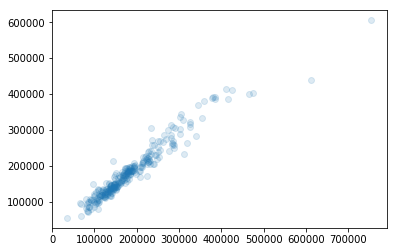

In [8]:
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

test_pred = gbr.predict(test_set)

plt.scatter(y_test, y_pred, alpha = 0.15)

In [9]:
feat_imp = pd.Series(gbr.feature_importances_, X_train.columns).sort_values(ascending = False)
feat_imp

GrLivArea               0.064471
LotArea                 0.046526
OverallQual             0.046152
BsmtUnfSF               0.043188
GarageArea              0.038665
1stFlrSF                0.037519
GarageYrBlt             0.036623
YearBuilt               0.036608
BsmtFinSF1              0.035611
TotalBsmtSF             0.034296
WoodDeckSF              0.030222
OverallCond             0.029196
YearRemodAdd            0.026233
LotFrontage             0.024834
2ndFlrSF                0.020518
MoSold                  0.017283
OpenPorchSF             0.015667
SaleCondition_Family    0.013528
BsmtFullBath            0.013097
BedroomAbvGr            0.012538
ScreenPorch             0.012188
EnclosedPorch           0.011956
Neighborhood_StoneBr    0.011771
Neighborhood_Crawfor    0.010828
MasVnrArea              0.010098
PoolArea                0.009979
BsmtFinSF2              0.009410
SaleCondition_Normal    0.009373
Functional_Typ          0.008553
TotRmsAbvGrd            0.008458
          

Text(0,0.5,'Feature Importance Score')

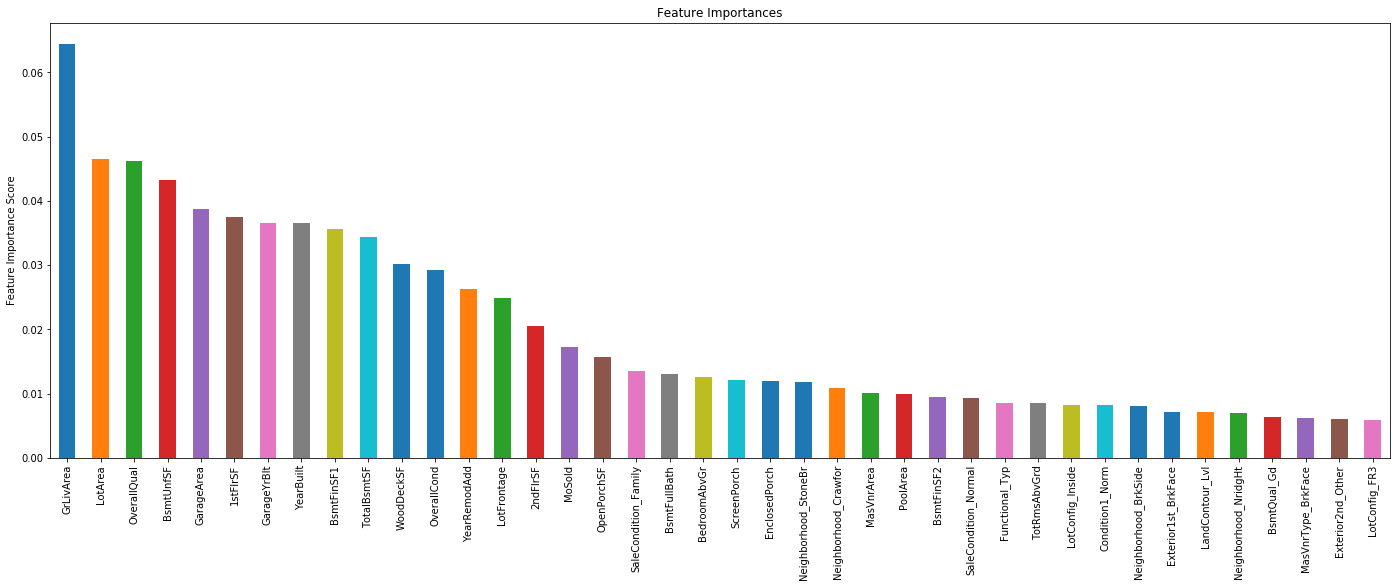

In [10]:
plt.figure(figsize = (24, 8))
feat_imp.head(40).plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [11]:
df_feat_imp = pd.DataFrame(feat_imp, columns = ['Importance'])
df_feat_imp.describe()

,Importance
count,276.000000
mean,0.003623
std,0.008828
min,0.000000
25%,0.000000
50%,0.000258
75%,0.002706
max,0.064471


In [12]:
useful_cols = df_feat_imp[df_feat_imp['Importance'] > 0.002745].index
useful_cols

Index(['GrLivArea', 'LotArea', 'OverallQual', 'BsmtUnfSF', 'GarageArea',
       '1stFlrSF', 'GarageYrBlt', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF',
       'WoodDeckSF', 'OverallCond', 'YearRemodAdd', 'LotFrontage', '2ndFlrSF',
       'MoSold', 'OpenPorchSF', 'SaleCondition_Family', 'BsmtFullBath',
       'BedroomAbvGr', 'ScreenPorch', 'EnclosedPorch', 'Neighborhood_StoneBr',
       'Neighborhood_Crawfor', 'MasVnrArea', 'PoolArea', 'BsmtFinSF2',
       'SaleCondition_Normal', 'Functional_Typ', 'TotRmsAbvGrd',
       'LotConfig_Inside', 'Condition1_Norm', 'Neighborhood_BrkSide',
       'Exterior1st_BrkFace', 'LandContour_Lvl', 'Neighborhood_NridgHt',
       'BsmtQual_Gd', 'MasVnrType_BrkFace', 'Exterior2nd_Other',
       'LotConfig_FR3', 'BsmtExposure_Gd', 'Fireplaces',
       'Neighborhood_Edwards', 'GarageCars', 'Functional_Sev', 'SaleType_New',
       'Street_Pave', 'BsmtExposure_No', 'LotConfig_FR2', 'MSZoning_FV',
       'FireplaceQu_Po', 'MSSubClass', 'FullBath', 'GarageType_CarPo

In [13]:
useful_cols = ['GrLivArea', 'OverallQual', 'LotArea', 'BsmtUnfSF', 'GarageArea',
               'TotalBsmtSF', 'BsmtFinSF1', 'LotFrontage', 'GarageYrBlt', '2ndFlrSF',
               '1stFlrSF', 'YearBuilt', 'OverallCond', 'MoSold', 'BedroomAbvGr',
               'MasVnrArea', 'OpenPorchSF', 'YearRemodAdd', 'GarageCars', 'WoodDeckSF',
               'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'ScreenPorch',
               'BsmtFullBath', 'Condition1_Norm', 'BsmtFinSF2', 'BsmtExposure_Gd',
               'Exterior1st_BrkFace', 'Fireplaces', 'Functional_Sev',
               'Neighborhood_Edwards', 'EnclosedPorch', 'SaleCondition_Normal',
               'Neighborhood_NridgHt', 'SaleCondition_Family', 'Neighborhood_BrkSide',
               'KitchenQual_Gd', 'PoolArea', 'Street_Pave', 'MSSubClass',
               'Functional_Typ', 'Neighborhood_Somerst', 'TotRmsAbvGrd',
               'KitchenAbvGr', 'YrSold', 'FullBath', 'BsmtFinType1_Rec',
               'Electrical_nan', 'SaleType_New', 'BsmtCond_Gd', 'Neighborhood_Veenker',
               'BsmtExposure_No', 'RoofMatl_WdShngl', 'LowQualFinSF',
               'Neighborhood_CollgCr', 'Condition1_RRAe', 'ExterQual_Gd',
               'SaleCondition_Partial', 'FireplaceQu_Fa', 'Heating_OthW',
               'LotConfig_FR2', 'Functional_Mod', 'Exterior2nd_MetalSd',
               'Exterior2nd_Stucco', '3SsnPorch', 'Neighborhood_Mitchel',
               'Functional_Maj2', 'HalfBath', 'Neighborhood_NoRidge',
               'train', 'SalePrice'
              ]

df_useful = df_full[useful_cols]
#df_useful = df_full

In [14]:
train_features = df_useful[df_useful['train'] == 1].drop('SalePrice', axis = 1).drop('train', axis = 1)
train_target = df_useful[df_useful['train'] == 1]['SalePrice']

test_features = df_useful[df_useful['train'] == 0].drop('SalePrice', axis = 1).drop('train', axis = 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size = 0.2)

RMSE: 26584.347024022067


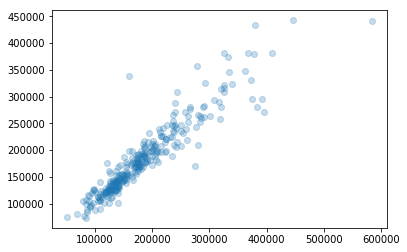

In [16]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(n_estimators = 512)
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

plt.scatter(y_test, y_pred, alpha = 0.25)

RMSE: 25533.234324142653


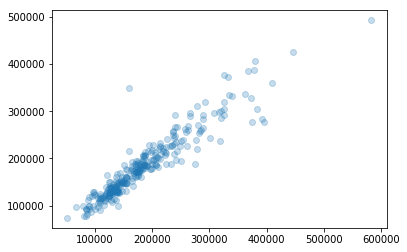

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 8192)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

plt.scatter(y_test, y_pred, alpha = 0.25)

In [18]:
useful_cols = ['GrLivArea', 'OverallQual', 'LotArea', 'BsmtUnfSF', 'GarageArea',
            'TotalBsmtSF', 'BsmtFinSF1', 'LotFrontage', 'GarageYrBlt', '2ndFlrSF',
            '1stFlrSF', 'YearBuilt', 'OverallCond', 'MoSold', 'BedroomAbvGr',
            'MasVnrArea', 'OpenPorchSF', 'YearRemodAdd', 'GarageCars', 'WoodDeckSF',
            'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'ScreenPorch',
            'BsmtFullBath', 'Condition1_Norm', 'BsmtFinSF2', 'BsmtExposure_Gd',
            'Exterior1st_BrkFace', 'Fireplaces', 'Functional_Sev',
            'Neighborhood_Edwards', 'EnclosedPorch', 'SaleCondition_Normal',
            'Neighborhood_NridgHt', 'SaleCondition_Family', 'Neighborhood_BrkSide',
            'KitchenQual_Gd', 'PoolArea', 'Street_Pave', 'MSSubClass',
            'Functional_Typ', 'Neighborhood_Somerst', 'TotRmsAbvGrd',
            'KitchenAbvGr', 'YrSold', 'FullBath', 'BsmtFinType1_Rec',
            'Electrical_nan', 'SaleType_New', 'BsmtCond_Gd', 'Neighborhood_Veenker',
            'BsmtExposure_No', 'RoofMatl_WdShngl', 'LowQualFinSF',
            'Neighborhood_CollgCr', 'Condition1_RRAe', 'ExterQual_Gd',
            'SaleCondition_Partial', 'FireplaceQu_Fa', 'Heating_OthW',
            'LotConfig_FR2', 'Functional_Mod', 'Exterior2nd_MetalSd',
            'Exterior2nd_Stucco', '3SsnPorch', 'Neighborhood_Mitchel',
            'Functional_Maj2', 'HalfBath', 'Neighborhood_NoRidge']

In [19]:
predictions = gbr.predict(test_features)
df_pred = pd.DataFrame({'Id': test_features.index, 'SalePrice': predictions.round(2)})

df_pred.head()

,Id,SalePrice
0,1461,128034.26
1,1462,162747.00
2,1463,188716.75
3,1464,192213.40
4,1465,178503.53


In [20]:
df_pred.to_csv('submission.csv', index = False)